# Homework, Week 19, Heather Leighton-Dick

## 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

## Supervised Learning Models:

### • use labeled data; target variable and independent variables

### • classification or regression

### • evaluation: accuracy, precision, recall, F1 score


### Classification: 

**–– goal: identify the class or group that an object or sample falls into**

**–– binary or multiclass**

**–– evaluation: precision, recall, F1 score**

**–– types: Logistic Regression, KNN**


  **Logistic Regression:**
  
    • process: takes in features and creates labelled classes to sort values into, using a sigmoid function
    

  **KNN (K Nearest Neighbors):**
  
    • process: predicts the class of a sample based on the classes of that sample's neighbors
    

### Regression:

**–– goal: use past data points to establish a trend predicting future points**

**–– univariate or multivariate**

**–– evaluation:**

**–– types: Linear Regression, KNR**


  **Linear Regression:**
  
    • process: takes features in and gives out a numeric continous output/trend that predicts future values, using parameters that minimize the cost or error
    

  **KNR (K Nearest Regression):**
  
    • process: 
    


### Either classification or regression:

  **DecisionTrees:**
    
    • process: takes in features and uses the best ones to create paths of nodes and branches where similar values/observations are grouped, ending in leaves which together contain 100% of the dataset
    • pros/cons: tends to overfit (work well on training set but not on test set)

  **Neural Networks:**
  
    • process: using Keras or Pytorch, build a model of perceptrons and connections from input to hidden layers to output/predictions; the model uses back propagation to learn; ReLU and activation functions help with complex patterns
    • evaluate: loss functions, which gauge error between prediction and provided target value
        Loss functions: L1 Loss, Cross-Entropy Loss, hinge embedding

  **Ensemble Methods (bagging/boosting):**
  
   **• Random Forest (non parametric, combination of multiple Decision Trees):**
   
        • process: takes input features and builds a stack of decision trees which each come from a randomly selected subset of the dataset (parallel independent trees = bagging); may also involve boosting methods (AdaBoost, XGBoost, RProp, etc. which build a stack of decision trees where each takes information from the previous tree)

  **SVM (Support Vector Machines, also can be used for outlier detection):**
  
    • process: takes in features and creates a decision boundary which generates class labels and assigns them to data points (decision boundary minimizes error/incorrect classification)
    • works best on small or medium complex datasets



## 2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

## Unsupervised learning models:

### • use unlabeled data

### • Clustering or Dimension Reduction

### • evaluation: RMSE, MAE, accuracy


### Clustering:

**–– goal: divide samples into meaningful clusters (choose a number of clusters that keeps samples tightly spaced but not too many clusters (plot the inertia and look for the x-axis value at the "elbow")**

**–– evaluation: minimize inertia (model.inertia_)**

**–– types: KMeans, Hierarchical**


  **K Means Clustering:**
  
    • process: places clusters in the plane so that inertia is minimized; use with StandardScaler in a pipeline for better clustering
    
    • evaluation: kmeans.inertia_ measures Sum of Squared Error (SSE) values between each observation and its group's mean; silhouette coefficient measures separation and tightness of clusters

  **Hierarchical Clustering:**
  
    • process, agglomerative: "bottom up", dendrogram; each sample begins on its own, then is gradually gathered up into other clusters with similar features
    
    • process, divisive: "top down", dendrogram; each sample begins in one big cluster which is gradually divided into clusters of samples with similar characteristics
    
    • calsulate similarity using centroids
    
    • note: cluster labels can be pulled out at any stage in the process (fcluster() method)

### Dimension Reduction:

**–– goal: finds patterns in data and uses the patterns to re-express the data in a compressed, less noisy form**

**–– evaluation:**

**–– types: PCA, NMF, t-SNE, Word Frequency Arrays**


  **PCA (Principal Component Analysis):**
  
    • process: decorrelates features (Pearson correlation), then finds the features with significant variance
   

  **NMF (Non-negative matrix factorization):**
  
    • process: all sample features are non-negative, use with MaxAbsScaler or Normalizer in pipeline format
   
    • used to build recommender systems (content-based or collaborative filtering)
    
  **t-SNE (t-disributed stochastic neighbor embedding):**
  
    • process: maps dataset values to 2D or 3D space, approximately maintaining the proximity of the values
    
    • helps with inspecting datasets but can't make predictions

  **Word Frequency Arrays**
  
    • process: each word in the document becomes a feature, and the frequency of the word's appearance is its value; the resulting sparse array can be condensed into a csr_matrix



## 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

### Notes: About a quarter of the dataset samples have at least one NaN in them. In addition, there are negative values in the Quantity column, about 440 records with "Unspecified" countries, and "Description" values of M and D (for manual entry and discount?), and "SAMPLES" (for giving a sample to a potential buyer?). There are letters present in the StockCode and InvoiceNo column values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
#pull in the csv data
original_df = pd.read_csv("data.csv", encoding = 'unicode_escape')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Special Case: Unit Price = 0.00 and Country = United Kingdom: drop these rows (assumption: these are company purchases, not customer sales)

In [3]:
sales1_df = original_df[original_df.UnitPrice >= 0.01]
sales1_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Quantity: Outliers as Damaged Goods (assumption: values -30 to -1 represent returns)

In [4]:
# exploring negative Quantity samples, deal with outliers

returns = sales1_df[sales1_df["Quantity"]<=0].sort_values("Quantity")
returns_no_cust = returns[returns["CustomerID"].isnull()]
damaged_loss = returns_no_cust[returns_no_cust["Quantity"]<=-30]
#print(damaged_loss["Description"])

In [5]:
# drop damaged_loss equivalent from original dataset

sales2_df = sales1_df[sales1_df.Quantity>=-30]

### InvoiceNo and StockCode: remove letters and spaces from strings

In [6]:
sales2_df["InvoiceNo"] = sales2_df["InvoiceNo"].replace(regex=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'S', 'N', ""], value='')

In [7]:
sales2_df["StockCode"] = sales2_df["StockCode"].str.replace(r'[^\d.]+', '')

In [8]:
sales2_df = sales2_df[sales2_df.StockCode != 'POST']
sales2_df = sales2_df[sales2_df.StockCode != 'POT']
sales2_df = sales2_df[sales2_df.StockCode != '']
sales2_df = sales2_df[sales2_df.StockCode != ' ']

In [9]:
#convert InvoiceNo and StockCode to integers from strings
sales2_df["InvoiceNo"] = sales2_df["InvoiceNo"].astype(int)
sales2_df["StockCode"] = sales2_df["StockCode"].astype(int)

### Description: Drop Description (StockCode is enough); possible to use Tfidf Vectorizer?

In [10]:
sales2_df = sales2_df.drop("Description", 1)

### Country: OneHotEncode (since there is a limited list of values)

In [33]:
original_df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
#pd.factorize to turn Country column into numerical data (One-Hot Encoding almost doubled memory usage)
#(thanks to Madison for the suggestion!)
sales2_df["Country"] = pd.factorize(sales2_df["Country"])[0]
sales2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536093 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536093 non-null  int64  
 1   StockCode    536093 non-null  int64  
 2   Quantity     536093 non-null  int64  
 3   InvoiceDate  536093 non-null  object 
 4   UnitPrice    536093 non-null  float64
 5   CustomerID   404513 non-null  float64
 6   Country      536093 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 32.7+ MB


In [15]:
#encode the column
#one_hot = pd.get_dummies(sales2_df["Country"])
# Drop column B as it is now encoded
#sales2_df = sales2_df.drop('Country',axis = 1)
# Join the encoded df
#sales2_df = sales2_df.join(one_hot)
#sales2_df.head()

### InvoiceDate: Convert to DateTime from string, extract month and time data, change time data to day or night and encode

In [12]:
sales2_df["InvoiceDate"] = pd.to_datetime(sales2_df["InvoiceDate"])

# extract month as new column
sales2_df["InvoiceMonth"] = sales2_df["InvoiceDate"].dt.month
sales2_df["InvoiceYear"] = sales2_df["InvoiceDate"].dt.year

# drop original column
sales2_df = sales2_df.drop('InvoiceDate', axis=1)

### CustomerID: Remove '.0'

In [13]:
#convert column to string, extract the decimal point
sales2_df["CustomerID"] = sales2_df["CustomerID"].astype(str)
sales2_df["CustomerID"] = sales2_df["CustomerID"].str.extract('(\d+)', expand=False)

#sales2_df["CustomerID"] = sales2_df["CustomerID"].astype(int)

### CustomerID NaNs: 
Now that we've taken out most of the damaged goods/losses and company purchases, I think it makes sense to replace the NaNs with "new" CustomerIDs. I'd like to do one ID for each invoice, but ran out of time, so I've randomly replaced each NaN in the column with an ID that is already present in the column. It's true that some of the items and/or invoices might be attached to the same customer, but since the goal is customer segmentation, it makes sense to reassign already-existing CustomerIDs in a random way. Hopefully, this helps keep the clusters from getting diluted among lots of extra new CustomerIDs, while recognizing there will be a trade-off that some information about items purchased together by a single customer will be lost or obscured (possibly mitigated by sampling with replacement so there is the possibility of duplication).

In [14]:
#fill NaNs in CustomerID with a random sample
values_to_fill = sales2_df['CustomerID']\
                .dropna()\
                .sample(n=sales2_df['CustomerID'].isna().sum(), random_state=1,replace=True)

sales2_df.loc[sales2_df['CustomerID'].isna(), 'CustomerID'] = values_to_fill.to_numpy()

## 4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers.

In [15]:
# -- Trial Run -- All Data --
#scale data
scaler = StandardScaler()
scaled_sales2_df = scaler.fit_transform(sales2_df)

#create the model and fit data
kmeans3_model = KMeans(n_clusters=3)

kmeans3_model.fit(scaled_sales2_df)

#create and print labels
labels = kmeans3_model.predict(scaled_sales2_df)
print(labels)

[0 0 0 ... 1 1 1]


In [53]:
#evaluate with model.inertia_ ==> lower is better

print(kmeans3_model.inertia_)

2883747.338634994


In [16]:
# -- Trial Run -- Subset (StockCode, CustomerID, InvoiceMonth, Quantity, Country)
sales2_df_subset = sales2_df[["StockCode", "CustomerID", "InvoiceMonth", "Quantity"]]

#scale data
scaler = StandardScaler()
scaled_sales2_df_subset = scaler.fit_transform(sales2_df_subset)

#create the model and fit data
kmeans3_model_sub = KMeans(n_clusters=3)

kmeans3_model_sub.fit(scaled_sales2_df_subset)

#create and print labels
labels_subset = kmeans3_model_sub.predict(scaled_sales2_df_subset)
print(labels_subset)

[1 1 1 ... 0 0 0]


In [55]:
print(kmeans3_model_sub.inertia_)

1221398.8474479942


In [17]:
# -- Trial Run -- Subset -- Normalizer scaler
sales2_df_subset = sales2_df[["StockCode", "CustomerID", "InvoiceMonth", "Quantity"]]

#scale data
scaler_n = Normalizer()
scaled_n_sales2_df_subset = scaler_n.fit_transform(sales2_df_subset)

#create the model and fit data
kmeans3_model_sub_n = KMeans(n_clusters=3)

kmeans3_model_sub_n.fit(scaled_n_sales2_df_subset)

print(kmeans3_model_sub_n.inertia_)

1026.938293114033


In [57]:
#run a function to try several cluster numbers
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_sales2_df_subset)
    sse.append(kmeans.inertia_)

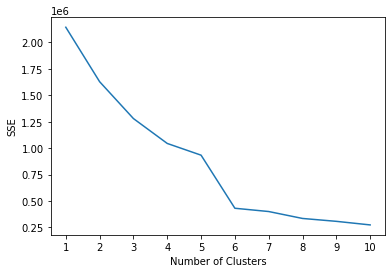

In [58]:
#plot the cluster numbers and find the elbow
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Should you look at all the data, or which subset of data should you use?

Looking at all the data gave me a really high inertia value; subsetting the dataset to focus on CustomerID and the things they bought (leaving out Country, InvoiceNo) cut the inertia value in half. So, it pays to focus the dataset, at least in this case.

### What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

According to the "elbow" plot, the downward slope decreases dramatically at the x value of 6, so the ideal number of clusters is 6.

### Final answer, using Normalizer instead of Standard Scaler, n_clusters=6, focused subset

In [18]:
# -- Final Run -- Subset (StockCode, CustomerID, InvoiceMonth, Quantity, Country)
sales2_df_subset = sales2_df[["StockCode", "CustomerID", "InvoiceMonth", "Quantity"]]

#scale data
scaler = Normalizer()
scaled_sales2_df_subset = scaler.fit_transform(sales2_df_subset)

#create the model and fit data
kmeans3_model_sub = KMeans(n_clusters=6)

kmeans3_model_sub.fit(scaled_sales2_df_subset)

print(kmeans3_model_sub.inertia_)

368.99242729639036


## 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

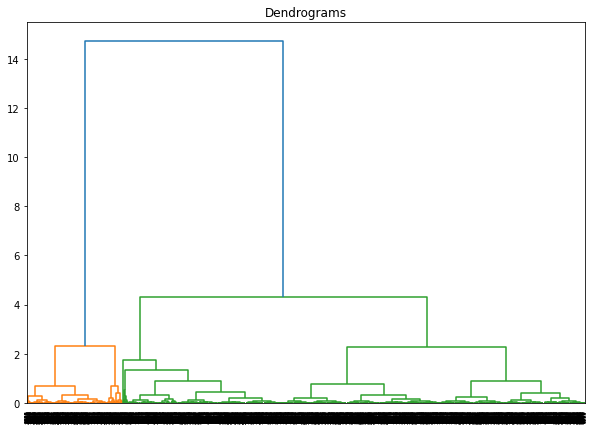

In [20]:
#sampling of sales2_df_subset [= sales2_df[["StockCode", "CustomerID", "InvoiceMonth", "Quantity"]]]
random_subset = sales2_df_subset.sample(n=5000)

#version of dataframe w/o CustomerID
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as shc

#scale sample data
scaler = Normalizer()
scaled_sample = scaler.fit_transform(random_subset)

#plot the dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_sample, method='ward'))
plt.show()
#mergings = linkage(sales2_df_subset, method = 'single')
#dendrogram(mergings, labels = CustomerID, leaf_rotation = 90, leaf_font_size = 6)
#plt.show()

## 6.	Compare the results of 4 and 5. Which approach do you think is best? Why?

I think the dendrogram makes more intuitive sense for customer segmentation, and the KMeans method seemed to struggle with this particular set of data.

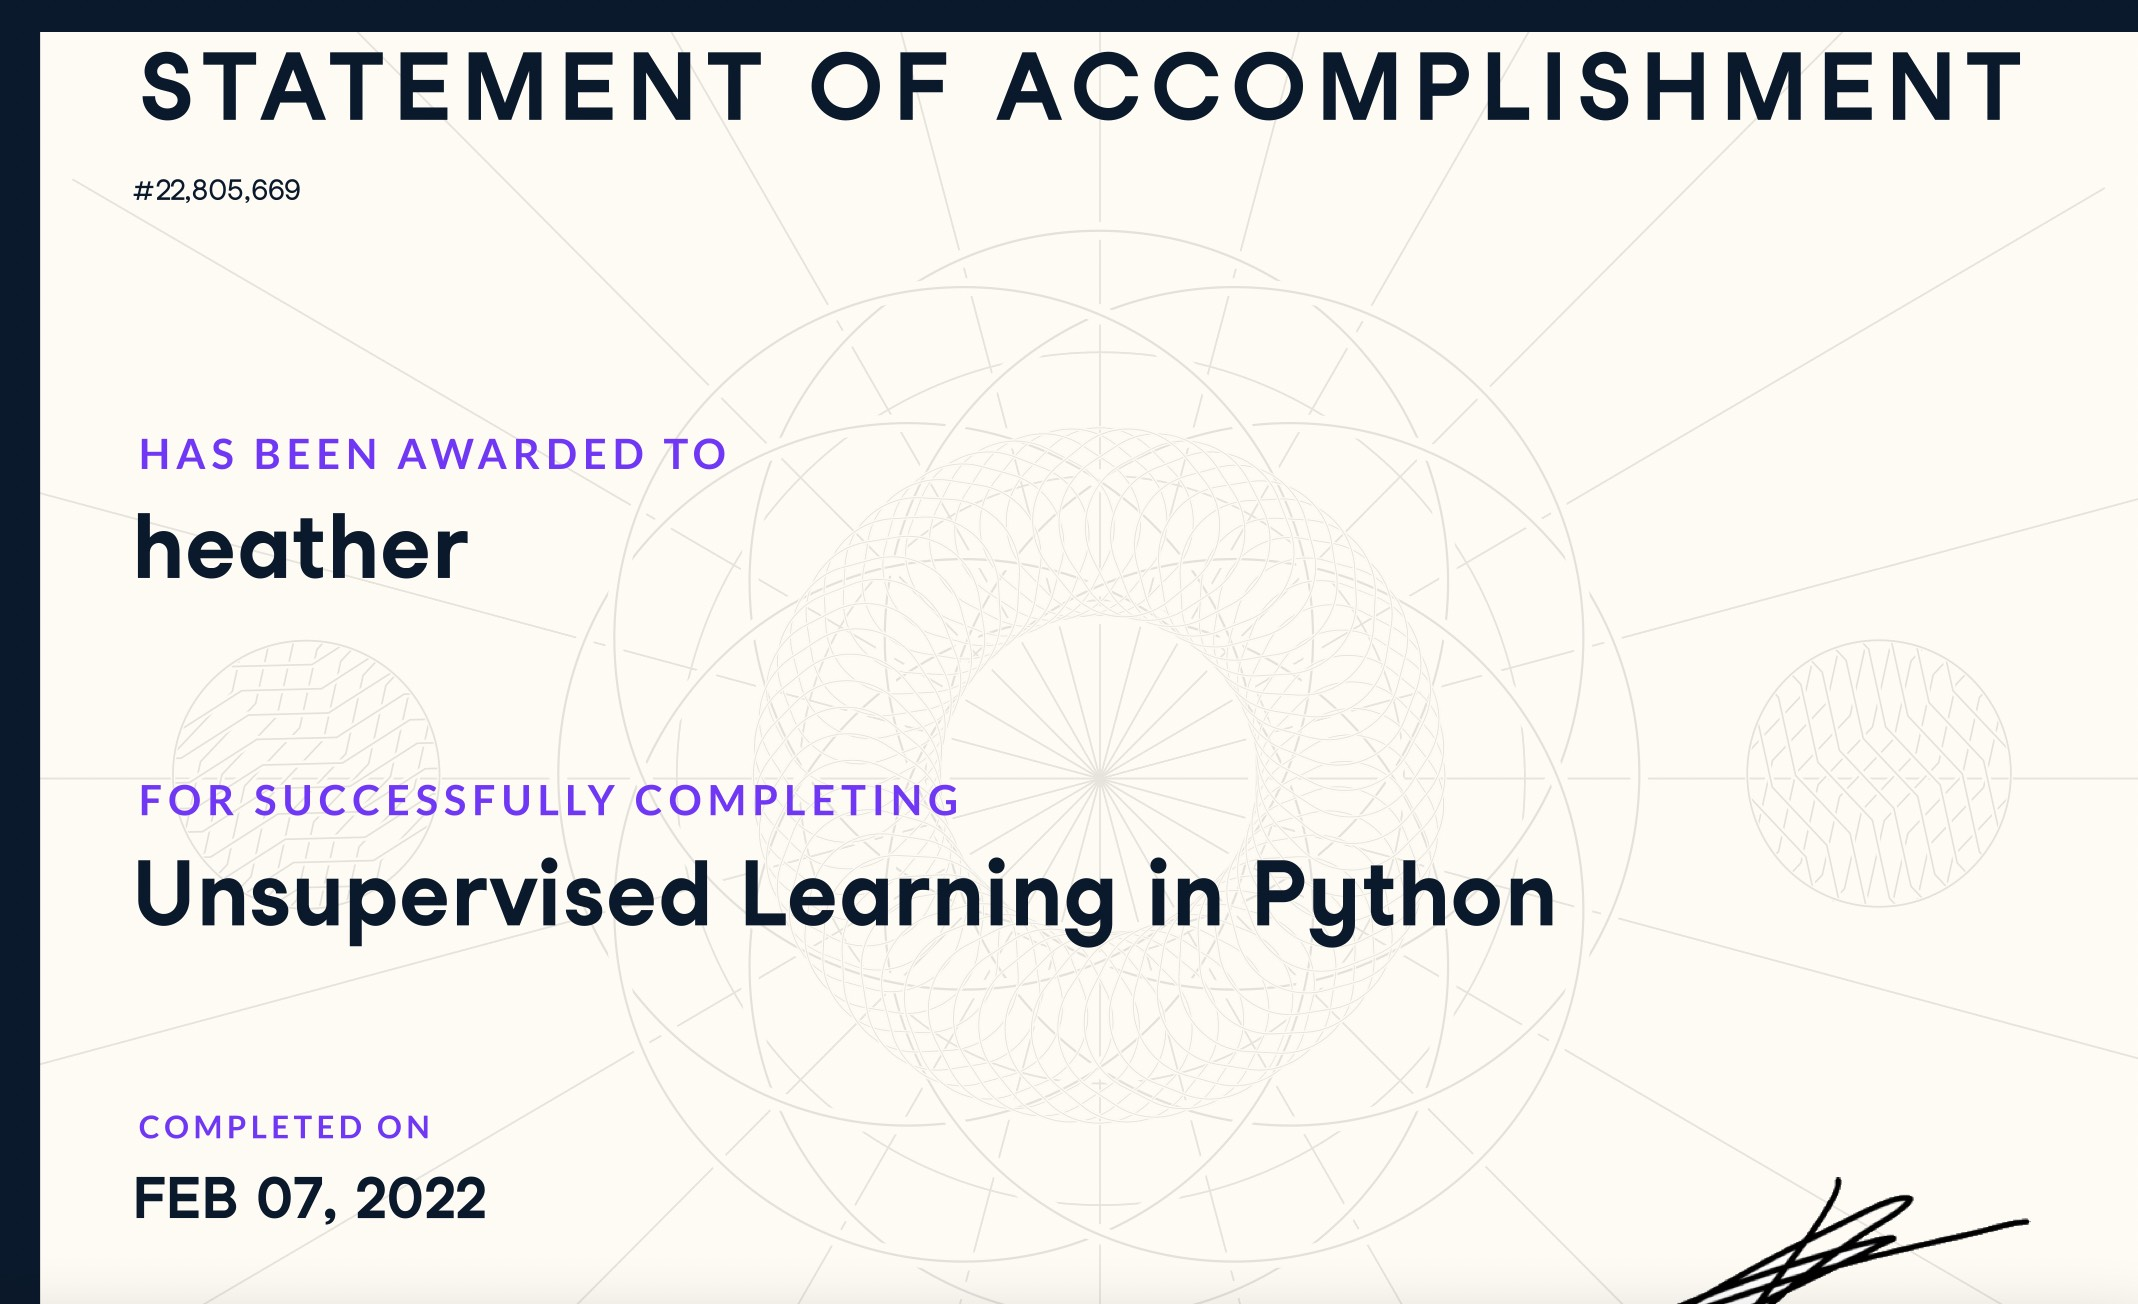